In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline 
from datetime import datetime as dt 
from os import listdir
from os.path import isfile, join

# In this dataset I'm trying to solve questions like :
### What was the best month for sales ? how much we earned this month 
### what city has the most number of sales 
### what time we should display advertisements to maximize the likehood of the product 
### what products are most often sold ? 
### what products are most combined together 


In [2]:
data_jan = pd.read_csv('Sales_January_2019.csv')

In [3]:
data_jan.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [4]:
data_sep=pd.read_csv('Sales_September_2019.csv')
data_oct=pd.read_csv('Sales_October_2019.csv')
data_nov=pd.read_csv('Sales_November_2019.csv')
data_may=pd.read_csv('Sales_May_2019.csv')
data_march=pd.read_csv('Sales_March_2019.csv')
data_june=pd.read_csv('Sales_June_2019.csv')
data_july=pd.read_csv('Sales_July_2019.csv')
data_jan=pd.read_csv('Sales_January_2019.csv')
data_feb=pd.read_csv('Sales_February_2019.csv')
data_dec=pd.read_csv('Sales_December_2019.csv')
data_aug=pd.read_csv('Sales_August_2019.csv')
data_apr=pd.read_csv('Sales_April_2019.csv')

In [5]:
data=pd.concat([data_sep,
data_oct,
data_nov,
data_may,
data_march,
data_june,
data_july,
data_jan,
data_feb,
data_dec,
data_aug,
data_apr])

In [16]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301"


In [6]:
data.to_csv('full_data_set.csv',index=False)

In [18]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301"


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 18382
Data columns (total 6 columns):
Order ID            186305 non-null object
Product             186305 non-null object
Quantity Ordered    186305 non-null object
Price Each          186305 non-null object
Order Date          186305 non-null object
Purchase Address    186305 non-null object
dtypes: object(6)
memory usage: 10.0+ MB


In [7]:
data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [8]:
data.dropna(axis=0,inplace=True)

In [9]:
data['Quantity Ordered'].value_counts()

1                   168552
2                    13324
3                     2920
4                      806
Quantity Ordered       355
5                      236
6                       80
7                       24
8                        5
9                        3
Name: Quantity Ordered, dtype: int64

In [10]:
data=data[data['Quantity Ordered']!='Quantity Ordered']

In [11]:
data['Quantity Ordered']=data['Quantity Ordered'].astype('int')

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 18382
Data columns (total 6 columns):
Order ID            185950 non-null object
Product             185950 non-null object
Quantity Ordered    185950 non-null int32
Price Each          185950 non-null object
Order Date          185950 non-null object
Purchase Address    185950 non-null object
dtypes: int32(1), object(5)
memory usage: 9.2+ MB


In [12]:
data['Price Each']=data['Price Each'].astype('float')

In [13]:
data['Order Date']=pd.to_datetime(data['Order Date'])

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 18382
Data columns (total 6 columns):
Order ID            185950 non-null object
Product             185950 non-null object
Quantity Ordered    185950 non-null int32
Price Each          185950 non-null float64
Order Date          185950 non-null datetime64[ns]
Purchase Address    185950 non-null object
dtypes: datetime64[ns](1), float64(1), int32(1), object(3)
memory usage: 9.2+ MB


In [14]:
data['Month']=data['Order Date'].dt.month

In [15]:
data['Year']=data['Order Date'].dt.year

In [16]:
data['weekday']=data['Order Date'].dt.weekday

In [39]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year,weekday
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9,2019,1
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9,2019,6
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9,2019,0
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",9,2019,4
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",9,2019,6


In [17]:
data['weekday']=data['weekday'].replace({0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'})

In [41]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year,weekday
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9,2019,Tuesday
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9,2019,Sunday
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9,2019,Monday
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",9,2019,Friday
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",9,2019,Sunday


In [18]:
data['Total Price']=data['Quantity Ordered']*data['Price Each']

In [43]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year,weekday,Total Price
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9,2019,Tuesday,15.36
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9,2019,Sunday,23.90
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9,2019,Monday,11.95
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",9,2019,Friday,149.99
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",9,2019,Sunday,11.95


In [44]:
data.shape

(185950, 10)

In [19]:
data['Order ID'].nunique()

178437

# What was the best month for sales ? how much we earned this month ? 

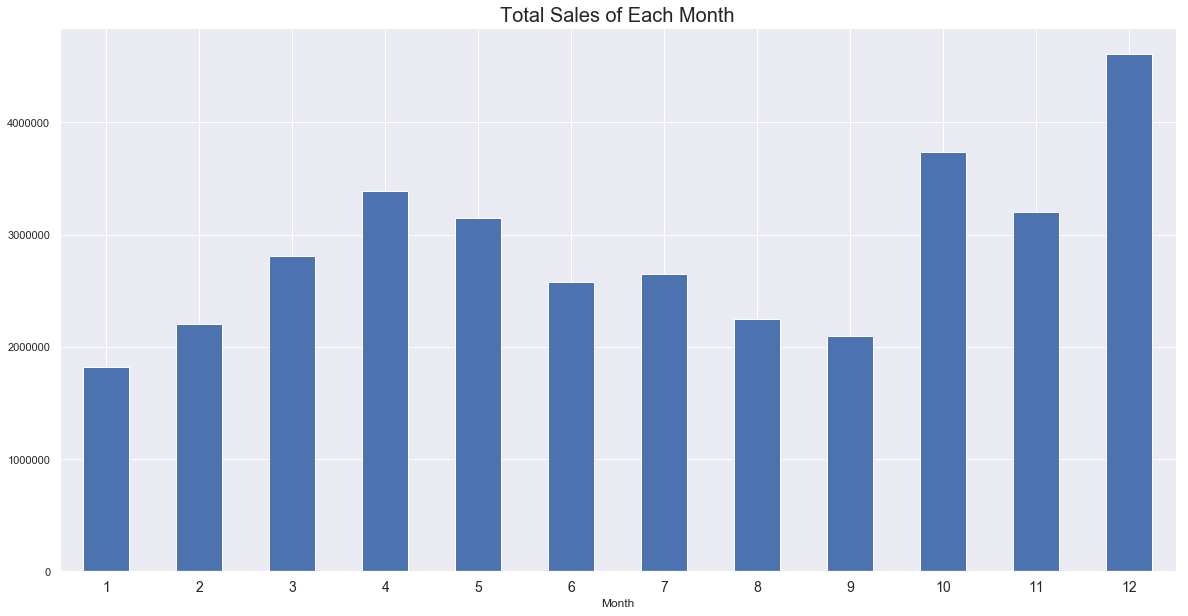

In [20]:
fig=plt.figure(figsize=(20,10))
data.groupby('Month')['Total Price'].sum().plot(kind='bar')
plt.xticks(rotation=0,fontsize=14)
plt.title('Total Sales of Each Month',fontsize=20)
plt.show()
fig.savefig("total_sales_of_each_month.png", bbox_inches='tight')

# what city has the most number of sales 

In [57]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year,weekday,Total Price
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9,2019,Tuesday,15.36
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9,2019,Sunday,23.90
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9,2019,Monday,11.95
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",9,2019,Friday,149.99
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",9,2019,Sunday,11.95


In [21]:
data['Purchase city and zipcode']=data['Purchase Address'].str.split(',').str[-1]

In [70]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year,weekday,Total Price,Purchase city and zipcode
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9,2019,Tuesday,15.36,CA 90001
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9,2019,Sunday,23.90,TX 73301
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9,2019,Monday,11.95,CA 90001
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",9,2019,Friday,149.99,WA 98101
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",9,2019,Sunday,11.95,GA 30301


In [22]:
data['City']=data['Purchase city and zipcode'].str.split(' ').str[1]

In [23]:
data.City.value_counts()

CA    74337
NY    24876
TX    24725
MA    19934
GA    14881
WA    14732
OR    10010
ME     2455
Name: City, dtype: int64

In [24]:
data['zipcode']=data['Purchase city and zipcode'].str.split(' ').str[-1]

In [25]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year,weekday,Total Price,Purchase city and zipcode,City,zipcode
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9,2019,Tuesday,15.36,CA 90001,CA,90001
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9,2019,Sunday,23.90,TX 73301,TX,73301
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9,2019,Monday,11.95,CA 90001,CA,90001
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",9,2019,Friday,149.99,WA 98101,WA,98101
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",9,2019,Sunday,11.95,GA 30301,GA,30301


In [26]:
data['City']=data['Purchase Address'].str.split(',').str[1]

In [90]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year,weekday,Total Price,Purchase city and zipcode,City,zipcode
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9,2019,Tuesday,15.36,CA 90001,Los Angeles,90001
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9,2019,Sunday,23.90,TX 73301,Austin,73301
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9,2019,Monday,11.95,CA 90001,Los Angeles,90001
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",9,2019,Friday,149.99,WA 98101,Seattle,98101
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",9,2019,Sunday,11.95,GA 30301,Atlanta,30301


# what city has the most number of sales

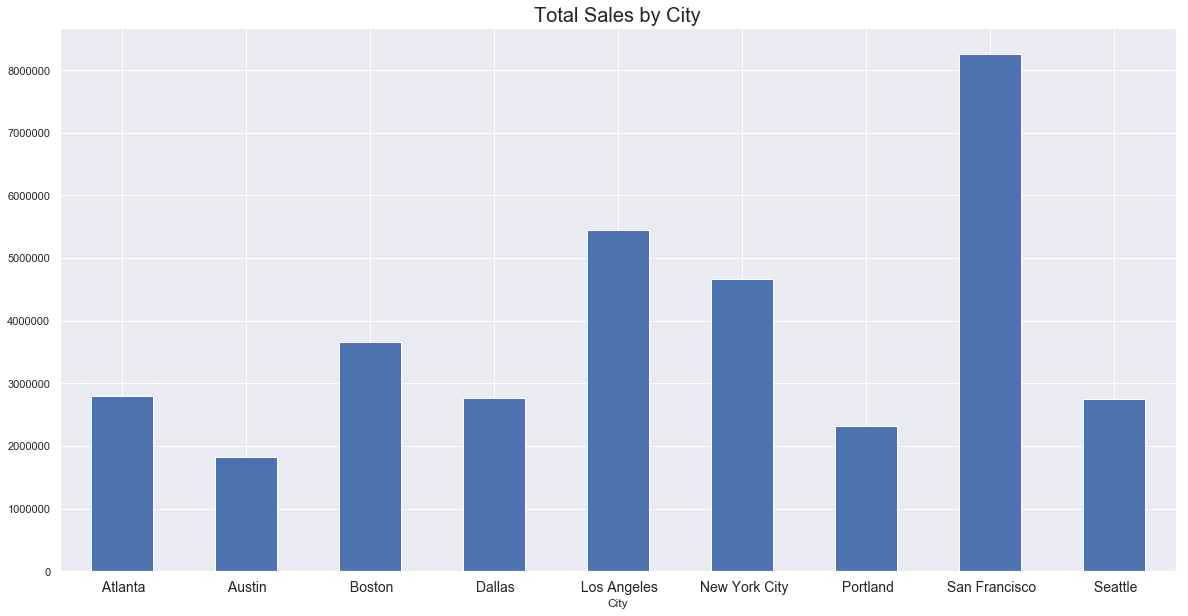

In [27]:
fig=plt.figure(figsize=(20,10))
data.groupby('City')['Total Price'].sum().plot(kind='bar')
plt.title('Total Sales by City',fontsize=20)
plt.xticks(rotation=0,size=14)
plt.show()
fig.savefig("total_sales_by_city.png", bbox_inches='tight')


# what time we should display advertisements to maximize the likehood of the product 

In [92]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year,weekday,Total Price,Purchase city and zipcode,City,zipcode
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9,2019,Tuesday,15.36,CA 90001,Los Angeles,90001
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9,2019,Sunday,23.90,TX 73301,Austin,73301
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9,2019,Monday,11.95,CA 90001,Los Angeles,90001
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",9,2019,Friday,149.99,WA 98101,Seattle,98101
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",9,2019,Sunday,11.95,GA 30301,Atlanta,30301


In [28]:
data['Order Hour']=data['Order Date'].dt.hour

In [94]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year,weekday,Total Price,Purchase city and zipcode,City,zipcode,Order Hour
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9,2019,Tuesday,15.36,CA 90001,Los Angeles,90001,14
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9,2019,Sunday,23.90,TX 73301,Austin,73301,10
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9,2019,Monday,11.95,CA 90001,Los Angeles,90001,17
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",9,2019,Friday,149.99,WA 98101,Seattle,98101,7
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",9,2019,Sunday,11.95,GA 30301,Atlanta,30301,19


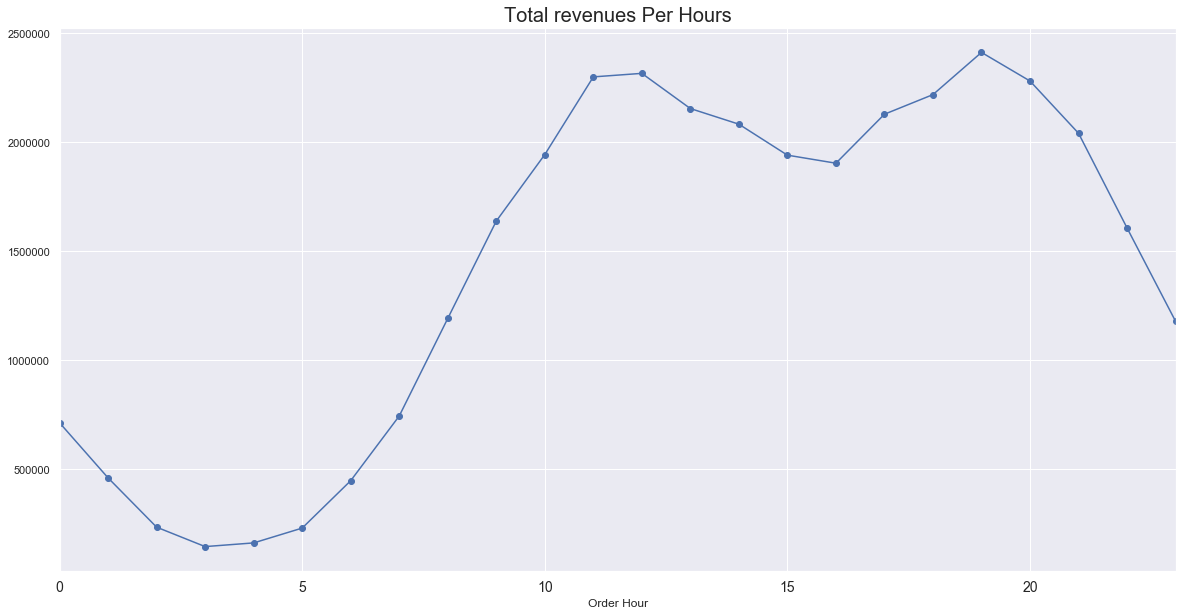

In [29]:
fig=plt.figure(figsize=(20,10))
data.groupby('Order Hour')['Total Price'].sum().plot(kind='line',marker='o')
plt.title('Total revenues Per Hours',fontsize=20)
plt.xticks(rotation=0,fontsize=14)
plt.show()
fig.savefig("total_revenues_per_hours.png", bbox_inches='tight')

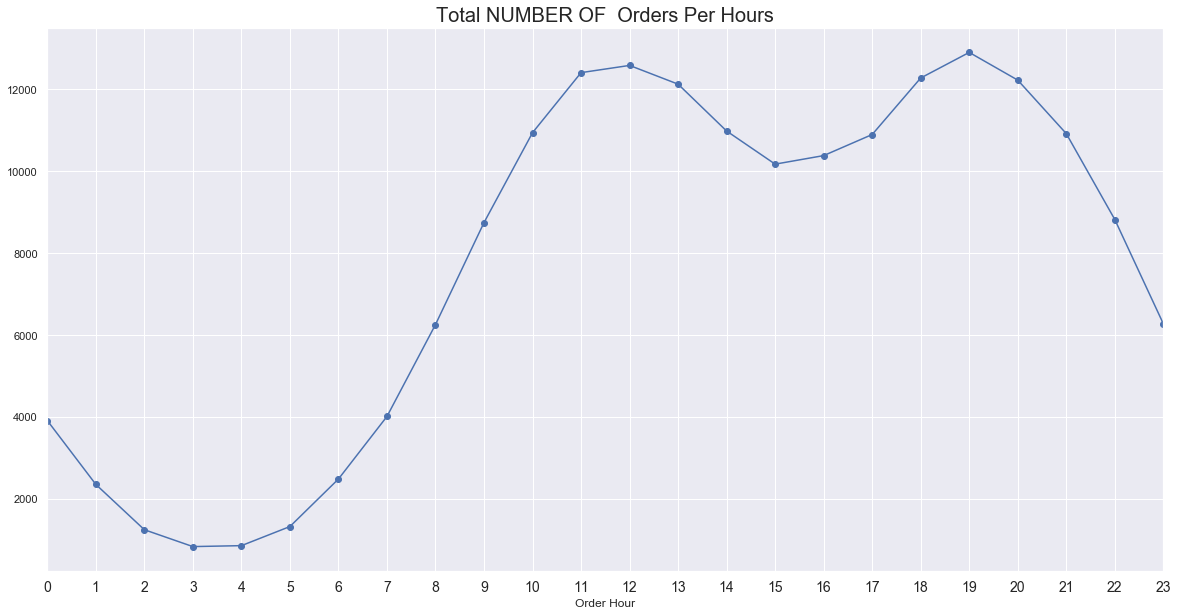

In [30]:
fig=plt.figure(figsize=(20,10))
data.groupby('Order Hour')['Order ID'].count().plot(kind='line',marker='o')
plt.title('Total NUMBER OF  Orders Per Hours',fontsize=20)
plt.xticks(range(0,24),rotation=0,fontsize=14)
plt.show()
fig.savefig("total_total_numbers_of_orders_per_hours.png", bbox_inches='tight')

# what products are most often sold ? 

In [110]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year,weekday,Total Price,Purchase city and zipcode,City,zipcode,Order Hour
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9,2019,Tuesday,15.36,CA 90001,Los Angeles,90001,14
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9,2019,Sunday,23.90,TX 73301,Austin,73301,10
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9,2019,Monday,11.95,CA 90001,Los Angeles,90001,17
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",9,2019,Friday,149.99,WA 98101,Seattle,98101,7
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",9,2019,Sunday,11.95,GA 30301,Atlanta,30301,19


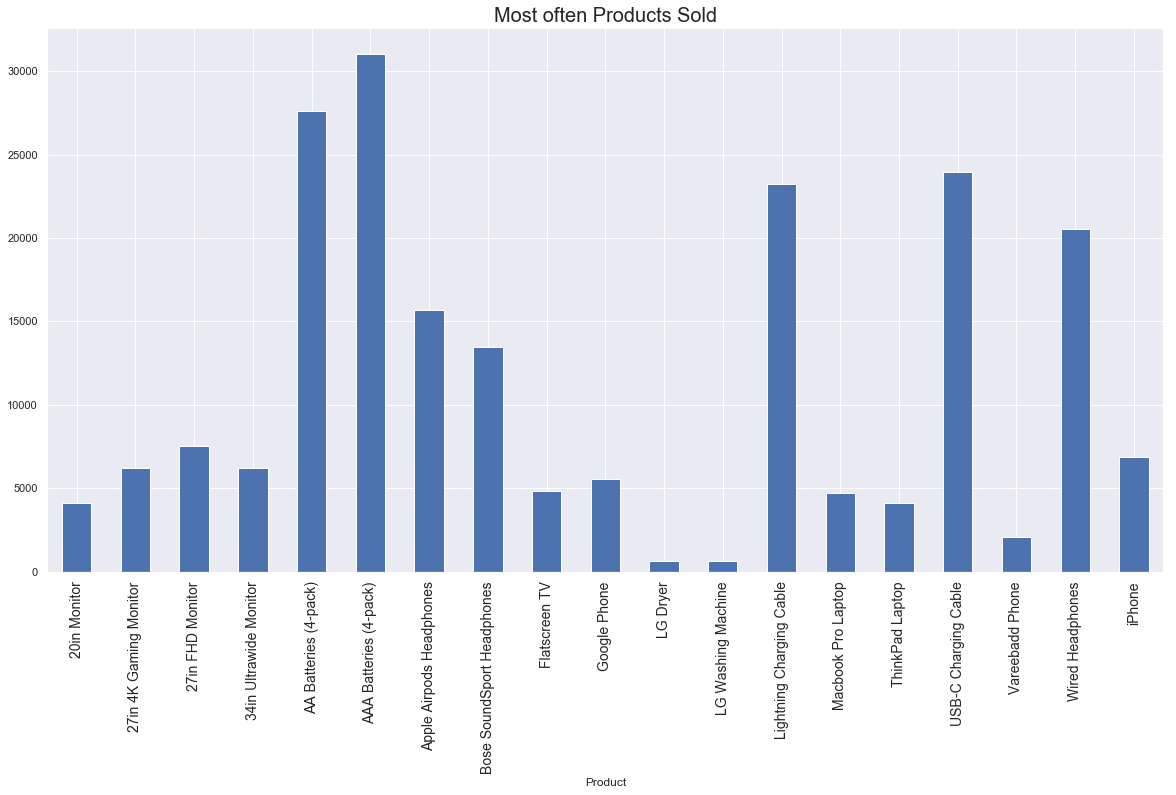

In [31]:
fig=plt.figure(figsize=(20,10))
data.groupby('Product')['Quantity Ordered'].sum().plot(kind='bar')
plt.title('Most often Products Sold',fontsize=20)
plt.xticks(fontsize=14)
plt.show()
fig.savefig("frequency_of_products_sold.png", bbox_inches='tight')

# what products are most combined together 

In [32]:
duplicated_products=data[data['Order ID'].duplicated(keep=False)]

In [33]:
duplicated_products['Grouped Products']=duplicated_products.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

C:\Users\20115\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [34]:
combined_products=duplicated_products[['Order ID','Grouped Products']].drop_duplicates()

In [135]:
combined_products.head()

,Order ID,Grouped Products
20,248171,"USB-C Charging Cable,USB-C Charging Cable"
60,248210,"iPhone,Lightning Charging Cable"
70,248219,"Bose SoundSport Headphones,Google Phone"
117,248265,"Vareebadd Phone,Bose SoundSport Headphones"
176,248323,"Google Phone,Bose SoundSport Headphones"


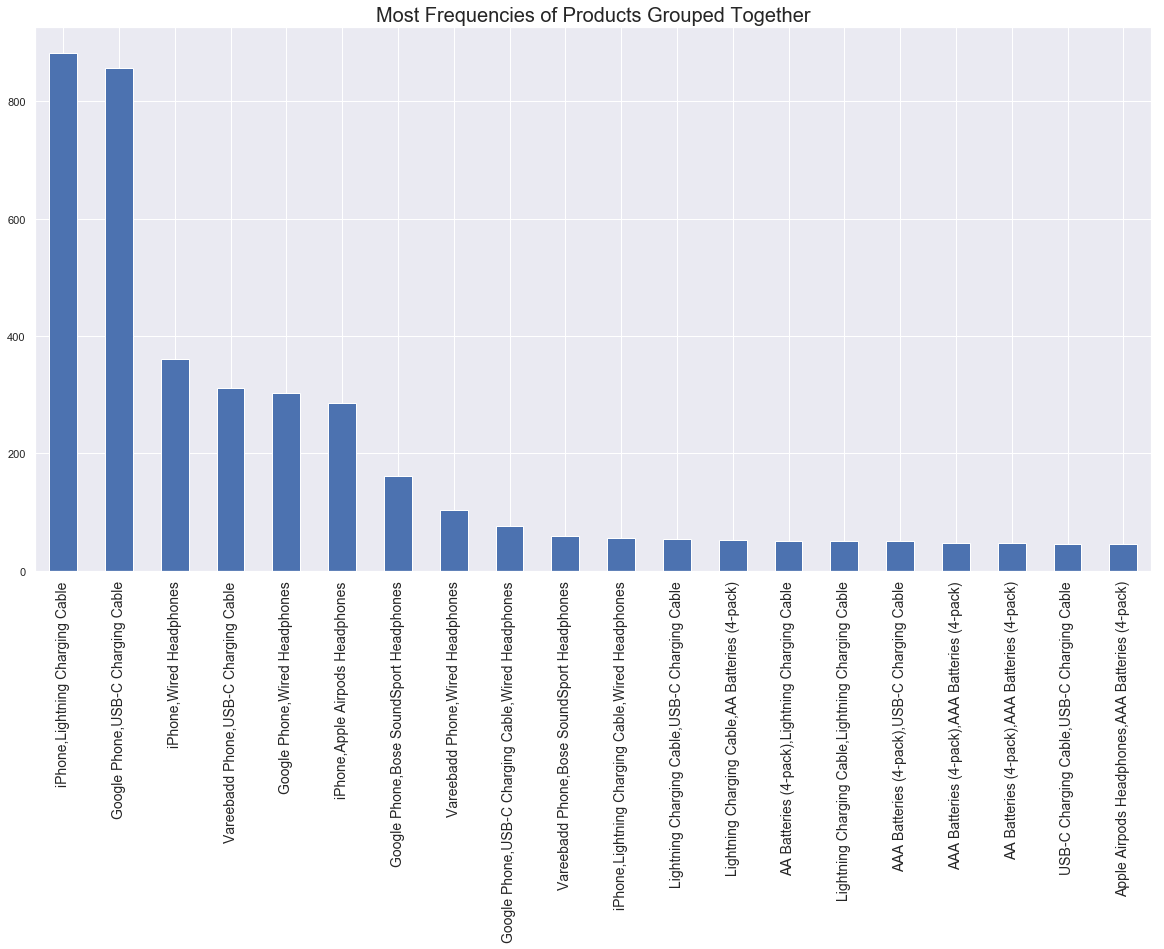

In [35]:
fig=plt.figure(figsize=(20,10))
combined_products['Grouped Products'].value_counts().head(20).plot(kind='bar')
plt.title('Most Frequencies of Products Grouped Together',fontsize=20)
plt.xticks(fontsize=14)
plt.show()
fig.savefig("frequency_of_products_grouped_together.png", bbox_inches='tight')

In [145]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year,weekday,Total Price,Purchase city and zipcode,City,zipcode,Order Hour
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9,2019,Tuesday,15.36,CA 90001,Los Angeles,90001,14
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9,2019,Sunday,23.90,TX 73301,Austin,73301,10
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9,2019,Monday,11.95,CA 90001,Los Angeles,90001,17
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",9,2019,Friday,149.99,WA 98101,Seattle,98101,7
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",9,2019,Sunday,11.95,GA 30301,Atlanta,30301,19
